In [1]:
#Code written by: Billy Atkinson (watkinson@umces.edu)
#Date of last revision: 07/01/2022
#This code reads in SS data to calculate locaton of eddies and finds the mean values of different variables within the eddies
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os

In [8]:
dir = '/data/watkinson/Summer2022/'
ds = xr.open_dataset(dir + 'META3.2_DT_allsat_Cyclonic_untracked_19930101_20210802.nc')
#amp = ds.amplitude.loc['2004-04-01T00:00:00.000000000':'2004-04-30T00:00:00.000000000']
#ds = ds.loc['2004-04-01T00:00:00.000000000':'2004-04-30T00:00:00.000000000']
#print(ds.variables)
#print(amp)

TypeError: 'str' object cannot be interpreted as an integer

In [110]:
#Loop all anticyclonic eddy files into one big file
from py_eddy_tracker.observations.observation import EddiesObservations
file_objects = sorted(glob.glob('/data/watkinson/Spring2022/Satellite/data/eddies/Anticyclonic/Anticyclonic_2004*.nc'))
all_a = EddiesObservations.concatenate(
    [EddiesObservations.load_file(i) for i in file_objects]
)
'''
#Loop all cyclonic eddy files into one big file
file_objects = sorted(glob.glob('/data/watkinson/Spring2022/Satellite/data/eddies/Cyclonic/*.nc'))
all_c = EddiesObservations.concatenate(
    [EddiesObservations.load_file(i) for i in file_objects]
)
'''

"\n#Loop all cyclonic eddy files into one big file\nfile_objects = sorted(glob.glob('/data/watkinson/Spring2022/Satellite/data/eddies/Cyclonic/*.nc'))\nall_c = EddiesObservations.concatenate(\n    [EddiesObservations.load_file(i) for i in file_objects]\n)\n"

In [109]:
#file_objects = sorted(glob.glob('/data/watkinson/Spring2022/Satellite/data/eddies/Anticyclonic/*.nc'))
#print(file_objects)

sat_files = sorted(glob.glob('/data/watkinson/Summer2022/data/cafe/1day/*.nc'))
#print('# of sat files = ',np.size(sat_files))
#print(sat_files.index('/data/watkinson/Summer2022/data/cafe/1day/A2004001.L4_gom_day_CAFE.nc'))
#print(sat_files.index('/data/watkinson/Summer2022/data/cafe/1day/A2004365.L4_gom_day_CAFE.nc'))
sat_files=sat_files[537:903]
print('# of sat files = ',np.size(sat_files))
print(sat_files[0])
print(sat_files[-1])

anti_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_2004*.nc'))
#anti_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Anticyclonic/*.nc'))
#anti_files = anti_files[508:2007]
#print(anti_files.index('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc'))
#print(anti_files.index('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20041231.nc'))  
print('# of anticyclonic eddy files = ',np.size(anti_files))
print(anti_files[0])
print(anti_files[-1])

cycl_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_2004*.nc'))
#cycl_files = cycl_files[508:2007]
print('# of cyclonic eddy files = ',np.size(cycl_files))
print(anti_files[0])
print(anti_files[-1])


# of sat files =  366
/data/watkinson/Summer2022/data/cafe/1day/A2004001.L4_gom_day_CAFE.nc
/data/watkinson/Summer2022/data/cafe/1day/A2004366.L4_gom_day_CAFE.nc
872
1237
# of anticyclonic eddy files =  3961
/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_19990208.nc
/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20120619.nc
# of cyclonic eddy files =  366
/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_19990208.nc
/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20120619.nc


In [53]:
#BEST CODE:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations
#take satelite files pats, sort them and load them into list
sat_files = sorted(glob.glob('/data/watkinson/Summer2022/data/cafe/1day_regrid/*.nc'))

print(len(sat_files))
#take anticyclonic eddy files paths, sort them and load them into list
anti_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_2004*.nc'))

#take cyclonic eddy files paths, sort them and load them into list
cycl_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_2004*.nc'))

cycl_chlor_mean = list()#empty list to load cyclonic eddy chlorophyll mean vlaues into throghout loop below
anti_chlor_mean = list()#empty list to load anticyclonic eddy chlorophyll mean values into throghout loop below

n=0 #set n to 0 so the loop starts with first file in list
while n < len(sat_files): #once finalized, put this inside a funciton so you can calcualte the mean for multiple variables
    #Load in data
    a = EddiesObservations.load_file(anti_files[n])#anticyclonic eddy data
    c = EddiesObservations.load_file(cycl_files[n])#cyclonic eddy data
    sat_data = RegularGridDataset((sat_files[n]),"lon","lat")#satellite data
    
    #this interpolates the satellite data grid onto the contours of the eddy data and uses mean function to calcualte values inside these contours
        #can also do this method for: ‘center’, ‘mean’, ‘max’, ‘min’, ‘nearest’ 
    anti_chlor = a.interp_grid(sat_data, "chlor_a", method="mean", intern=False)#this interpolates the sa
    cycl_chlor = c.interp_grid(sat_data, "chlor_a", method="mean", intern=False)
    
    #append the result for each file loop to the variables below
    anti_chlor_mean = np.concatenate([anti_chlor_mean,anti_chlor])
    cycl_chlor_mean = np.concatenate([cycl_chlor_mean,cycl_chlor])
    #anti_chlor_mean.append(anti_chlor)
    #cycl_chlor_mean.append(cycl_chlor)
    
    n=n+1


We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004001.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004002.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004003.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004004.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004005.L4_gom_day_CAFE.nc


366


We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004006.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004007.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004008.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004009.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004010.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004011.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004012.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004013.L4_gom_day_

In [54]:
print("# of Anticyclonic Eddies in 2004:", np.size(anti_chlor_mean))
print("# of Anticyclonic Eddies filled with nan:",np.count_nonzero(np.isnan(anti_chlor_mean)))
M = anti_chlor_mean[~np.isnan(anti_chlor_mean)]
print("# of Anticyclonic Eddies that have a value:", np.size(M))
print("Index of Anticyclonic Eddies that have data:",np.where(anti_chlor_mean>0))
print("# of Cyclonic Eddies in 2004:", np.size(cycl_chlor_mean))
print("# of Cyclonic Eddies filled with nan:",np.count_nonzero(np.isnan(cycl_chlor_mean)))
N = cycl_chlor_mean[~np.isnan(cycl_chlor_mean)]
print("# of Cyclonic Eddies that have a value:", np.size(N))
print("Index of Cyclonic Eddies that have data:",np.where(cycl_chlor_mean>0))

# of Anticyclonic Eddies in 2004: 3634
# of Anticyclonic Eddies filled with nan: 3565
# of Anticyclonic Eddies that have a value: 69
Index of Anticyclonic Eddies that have data: (array([  23,  228,  233,  347,  360,  389,  390,  537,  575,  668,  686,
        749,  756,  829,  842,  846,  872,  957,  977, 1023, 1106, 1107,
       1119, 1138, 1305, 1481, 1516, 1520, 1894, 2294, 2624, 2638, 2648,
       2660, 2680, 2918, 2922, 2923, 2924, 2980, 2982, 3094, 3215, 3438,
       3452, 3453, 3457, 3503, 3523, 3587]),)
# of Cyclonic Eddies in 2004: 4932
# of Cyclonic Eddies filled with nan: 4743
# of Cyclonic Eddies that have a value: 189
Index of Cyclonic Eddies that have data: (array([   8,   28,   73,  131,  172,  198,  220,  262,  273,  280,  287,
        289,  307,  315,  318,  319,  321,  322,  333,  343,  344,  363,
        476,  484,  500,  601,  608,  661,  715,  720,  947,  949,  967,
       1000, 1056, 1057, 1066, 1080, 1082, 1086, 1104, 1109, 1117, 1208,
       1242, 1260, 1302, 13

In [2]:
######IMPORTANT: Comparing thi sto output on eddy_mask.ipynb shows that the values in mean function that are nan, does not mean no values inside of it
               #Figure out what makes the value nan or not because thats not it: multiple eddies have chl inside on eddy mask but only 2 here. 

from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.dataset.grid import GridDataset
from py_eddy_tracker.observations.observation import EddiesObservations
dir = "/data/watkinson/Summer2022/data/cafe/"
sat_data = RegularGridDataset((dir + "regrid_CAFE_GOM_20061532006160.nc"),"lon","lat",nan_masking=False)
#sat_data = GridDataset((dir + "regrid_CAFE_GOM_20061532006160.nc"),"lon","lat")#,nan_masking=True)
dir = "/data/watkinson/Spring2022/Satellite/data/eddies/Cyclonic/"
c = EddiesObservations.load_file(dir + "Cyclonic_20060605.nc")
dir = "/data/watkinson/Spring2022/Satellite/data/eddies/Anticyclonic/"
a = EddiesObservations.load_file(dir + "Anticyclonic_20060605.nc")
chl_mean_c = c.interp_grid(sat_data, "chlor_a", method="mean", intern=False)
chl_mean_a = a.interp_grid(sat_data, "chlor_a", method="mean", intern=False)
#print(chl_mean_c)
print(chl_mean_a)

We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/regrid_CAFE_GOM_20061532006160.nc
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'


[       nan 0.                nan        nan 0.07254351        nan]


In [4]:
#Function for plotting two biomass against each other and calculating
#slope, r^2 value, intercept and standard error
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def linearplot(xdata,ydata,title,xlabel,ylabel
               ,axislimits,xlimit,ylimit,linearregress):#,file):
    #newshapex=np.reshape(xdata,(730,203680))
    #newshapey=np.reshape(ydata, (730,203680))
    #newshapex=np.reshape(xdata,(24,203680))
    #newshapey=np.reshape(ydata, (24,203680))
    #x=newshapex[0,:]
    #y=newshapey[0,:]
    x=np.reshape(xdata, -1)
    y=np.reshape(ydata, -1)
    #x = x[np.logical_not(np.isnan(x))]
    #y = y[np.logical_not(np.isnan(y))]
    #x_new = np.ma.masked_where(np.ma.getmask(y),x)
    indices = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
    x = x[indices]
    y = y[indices]
    plt.scatter(x,y,s=3,c='blue')
    if (axislimits): #True if you want to set axis limits, False if you want python to do it based on data
        plt.xlim(xlimit)
        plt.ylim(ylimit)
    else:
        "continue"
   
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if (linearregress):#True if you want to calculate linear regression
        print(linregress(x,y))
        slope, intercept, r, p, se = linregress(x, y)
        print(f"R-squared: {r**2:.6f}")
        line = slope*x + intercept
        plt.plot(x,line,color='black',ls='--',
                 label='y={:.3f}x+{:.3f}, $R^2$={:.3f},stderr={:.3f}'
                 .format(slope,intercept,r**2,se))
        plt.legend(loc='best')
    else:
        "continue"
    #plt.savefig('/data/watkinson/Figures_Inversion/linear_model/' + file)
    plt.show()

In [ ]:
linearplot(

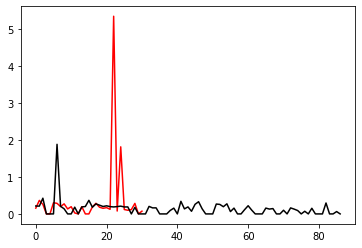

In [17]:
plt.plot(M,color='r')
plt.plot(N,color='k')
plt.show()

In [93]:
from py_eddy_tracker.dataset.grid import RegularGridDataset
############Load in the eddy data for anticyclonic and cyclonic and the SSH data
######Anticyclonic data
dir = "/data/watkinson/Summer2022/data/eddies/Anticyclonic/"
a = EddiesObservations.load_file(dir + "Anticyclonic_20060605.nc")
######Cyclonic data
dir = "/data/watkinson/Summer2022/data/eddies/Cyclonic/"
c = EddiesObservations.load_file(dir + "Cyclonic_20060605.nc")
######SSH data
dir = "/data/watkinson/Spring2022/Satellite/data/"
SSH_data = RegularGridDataset((dir + "modified_hycom_gomu_501_2006060500_t000.nc"),
    "lon",
    "lat")
######Try Sat data: doesnt work need to regrid
dir = "/data/watkinson/Summer2022/data/cafe/"
sat_data = RegularGridDataset((dir + "regrid_CAFE_GOM_20061532006160.nc"),
    "lon",
    "lat")

We assume pixel position of grid is centered for /data/watkinson/Spring2022/Satellite/data/modified_hycom_gomu_501_2006060500_t000.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/regrid_CAFE_GOM_20061532006160.nc


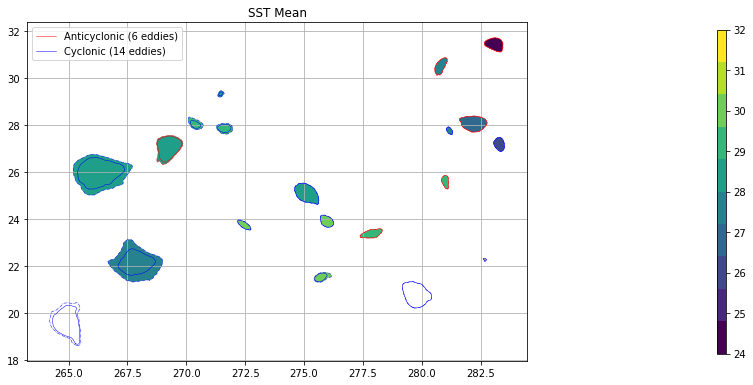

In [94]:
def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    #ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title)
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    ax.legend()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.95, 0.05, 0.01, 0.9]))

#sat_data.add_uv(
ax = start_axes("SST Mean")
sst_kwargs = dict(vmin=24,vmax=32,cmap="viridis")
#m = sat_data.display(ax,"sst",**sst_kwargs)
a.display(ax, color="r", linewidth=0.5, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth=0.5, label="Cyclonic ({nb_obs} eddies)", ref=-10)
sst= a.interp_grid(sat_data, "sst", method="mean", intern=False)
a.filled(ax, sst, ref=-10, **sst_kwargs)
sst= c.interp_grid(sat_data, "sst", method="mean", intern=False)
m = c.filled(ax, sst, ref=-10, **sst_kwargs)
update_axes(ax,m)

In [35]:
dir = '/data/watkinson/Spring2022/Satellite/data/eddies/'
cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies.pkl")
anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies.pkl")
cycl_eddies = cycl_eddies.iloc[6::50,:]
anti_eddies = anti_eddies.iloc[6::50,:]
#print('Cyclonic Eddy Shape Error Summary:')
#cycl_eddies['effective_contour_shape_error'].describe()
print('Anticyclonic Eddy Shape Error Summary:')
anti_eddies['effective_contour_shape_error'].describe()
#test = cycl_eddies.iloc[:,[0

Anticyclonic Eddy Shape Error Summary:


ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [36]:
#ds2 = ds.iloc[:,[1,18]]#selecting amplitude and time from the ds dataframe
ds2 = cycl_eddies.reset_index(drop=True)#drop previous method of indexing and reset
ds2['time2']=pd.to_datetime(ds2['time'])#convert entire "Dates" Column to datetime format this time 
ds2.index=ds2['time2']#replace index with entire "Dates" Column to work with groupby function
ds2 = ds2.iloc[:,[4]]#simplify dataframe to just time index and amplitude
ds2 = ds2["2002-07-04":"2012-06-19"]
ds2 = ds2.dropna()
#ds4 = ds3.iloc[:,[1,18]]#selecting amplitude(0) and time from the ds dataframe 12=speed
ds4 = anti_eddies.reset_index(drop=True)#drop previous method of indexing and reset
ds4['time2']=pd.to_datetime(ds4['time'])#convert entire "Dates" Column to datetime format this time 
ds4.index=ds4['time2']#replace index with entire "Dates" Column to work with groupby function
ds4 = ds4.iloc[:,[4]]#simplify dataframe to just time index and amplitude
ds4 = ds4["2002-07-04":"2012-06-19"]
ds4 = ds4.dropna()
ds4

,effective_contour_shape_error
time2,
2002-07-04,29.5
2002-07-04,38.5
2002-07-04,35.0
2002-07-04,13.0
2002-07-04,21.0
...,...
2012-06-18,52.5
2012-06-19,19.0
2012-06-19,33.5


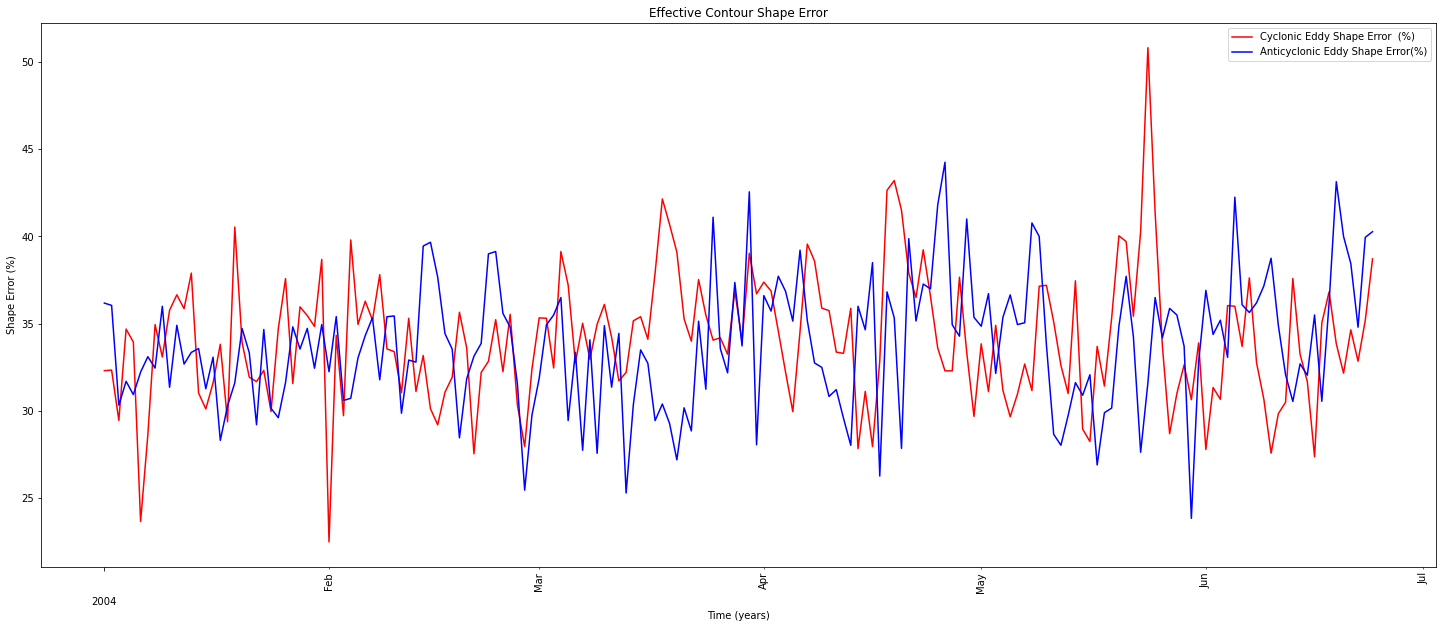

In [43]:
amp_cycl_mean = ds2.resample('D').mean()
cycl_shape_error_mean = amp_cycl_mean["2004-01-01":"2004-06-24"]
amp_anti_mean = ds4.resample('D').mean()
anti_shape_error_mean = amp_anti_mean["2004-01-01":"2004-06-24"]
y=anti_shape_error_mean.effective_contour_shape_error
z=cycl_shape_error_mean.effective_contour_shape_error
start = dt.datetime(2004,1,1)
new_dates = [start + dt.timedelta(days=i) for i in range(176)]
#print(new_dates)
x = new_dates
import matplotlib.dates as mdates
xfmt_major=mdates.DateFormatter('\n\n%Y')
xfmt_minor=mdates.DateFormatter('%b')
months=mdates.MonthLocator()
years=mdates.YearLocator()
fig , ax = plt.subplots(figsize=(25, 10))
ax.plot(x,z,'r',label='Cyclonic Eddy Shape Error  (%)')#,ls='--',alpha=.5)
ax.plot(x,y,'b',label='Anticyclonic Eddy Shape Error(%)')
#ax.plot(x[15:-15],count_cycl[15:-15],'r',label='# of Cyclonic Eddies per Day')#,alpha=.5)#,ls='--',alpha=.5)
#ax.plot(x[15:-15],count_anti[15:-15],'b',label='# of Anticyclonic Eddies per Day')#,alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'k',label='15 day running mean')
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'k')#,label='15 day running mean')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Amplitude (m)')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Amplitude (m)')
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Speed (m/s)')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Speed (m)')
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Effective Contour Height (m)')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Effective Contour Height (m)')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Effective Contour Height (m)')
#ax.vlines(x=['2002-01-01','2003-01-01','2004-01-01','2005-01-01','2006-01-01','2007-01-01','2008-01-01','2009-01-01','2010-01-01','2011-01-01','2012-01-01'],
          #ymin=np.min(Rm_cycl_amp), ymax=np.max(Rm_anti_amp),colors='k',label='New Year')
#plt.axhline(y=0, color='k', linestyle='--')
#ax.plot(x,amp_cycl_mean_2year.effective_area,'r',label='Cyclonic Eddy Effective Area  (m^2)')#,ls='--',alpha=.5)
#ax.plot(x,amp_anti_mean_2year.effective_area,'b',label='Anticyclonic Eddy Effective Area (m^2)')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(xfmt_major)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
#plt.title('Daily-Averaged Eddy Amplitude: Smoothed with 15 day Rm')
#plt.title('Daily-Averaged Maximum circum-averaged speed')
plt.title('SSH filtered height for effective contour which defines eddy edge')
plt.title('Effective Contour Shape Error')
#plt.title('# of Eddies per Day')
ax.set_xlabel("Time (years)")
ax.set_ylabel('SSH around eddy edge (m)')
ax.set_ylabel('Shape Error (%)')
#ax.set_ylabel('# of Eddies')
ax.legend(loc='best')
plt.show()